# Part 1: Using wget

In [ ]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2023-04-09 03:38:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  2.00MB/s    in 0.2s    

2023-04-09 03:38:00 (2.00 MB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [ ]:
# list files in current directory
!ls

arrhythmia.data  sample_data


In [ ]:
# check if the data has a header
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [ ]:
# load the data into a dataframe to explore it
import pandas as pd
df = pd.read_csv('./arrhythmia.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# pick the relevant columns as per the dataset documentation
data = df.iloc[:,0:6].copy()
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']
data

,age,sex,height,weight,QRS duration,P-R interval
0,76,0,190,80,91,193
1,56,1,165,64,81,174
2,54,0,172,95,138,163
3,55,0,175,94,100,202
4,75,0,190,80,88,181
...,...,...,...,...,...,...
447,53,1,160,70,80,199
448,37,0,190,85,100,137
449,36,0,166,68,108,176
450,32,1,155,55,93,106


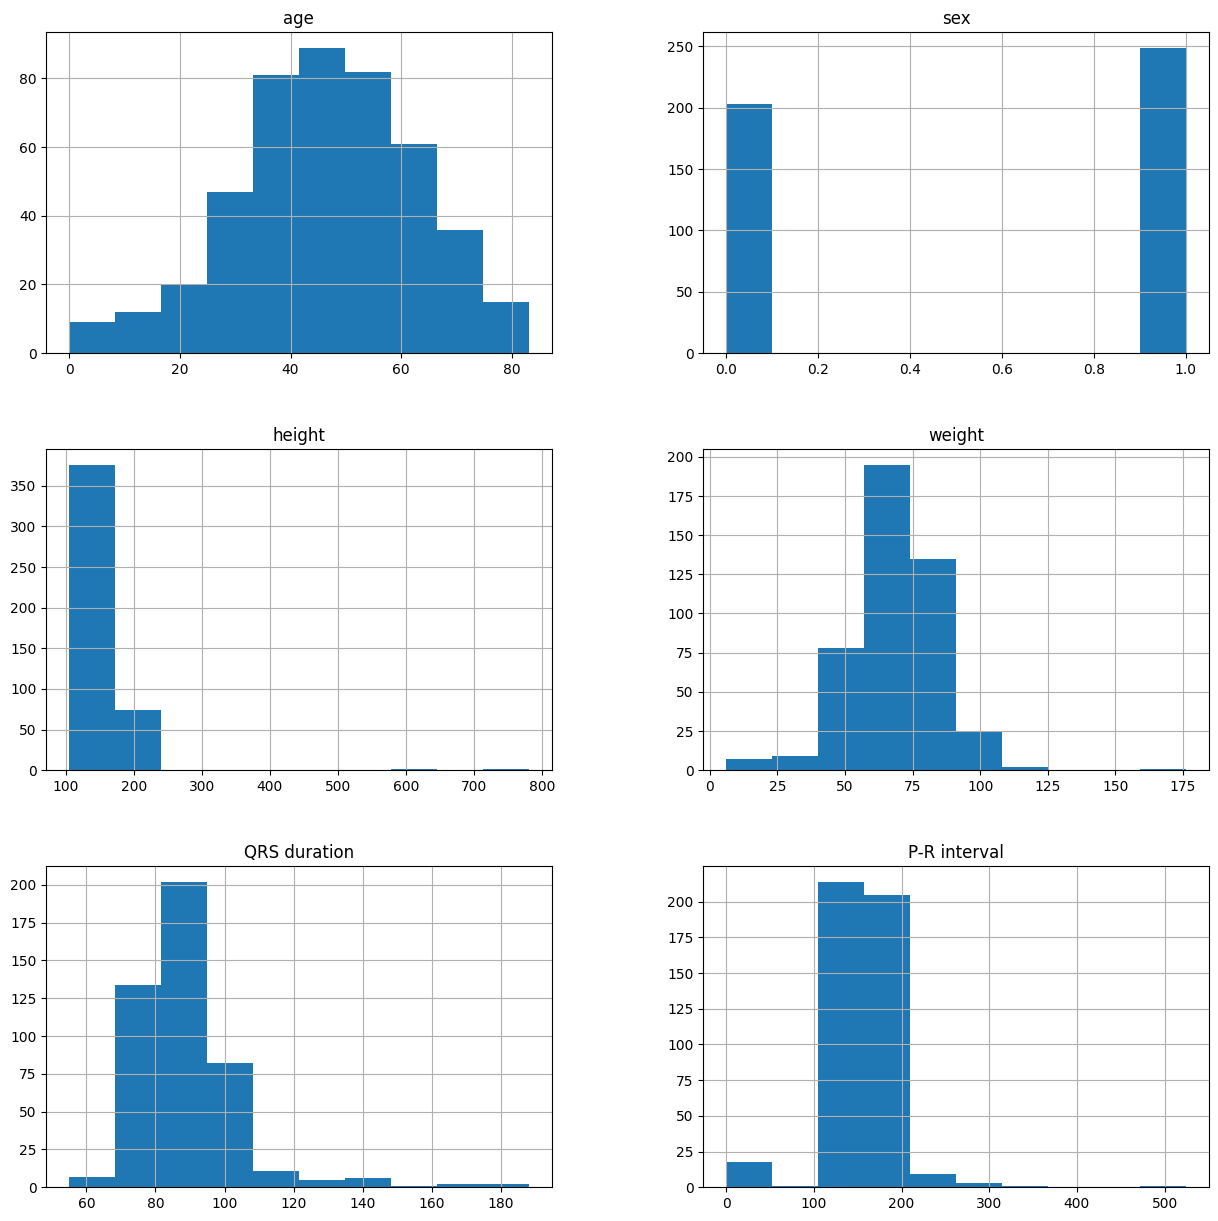

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
data.hist();

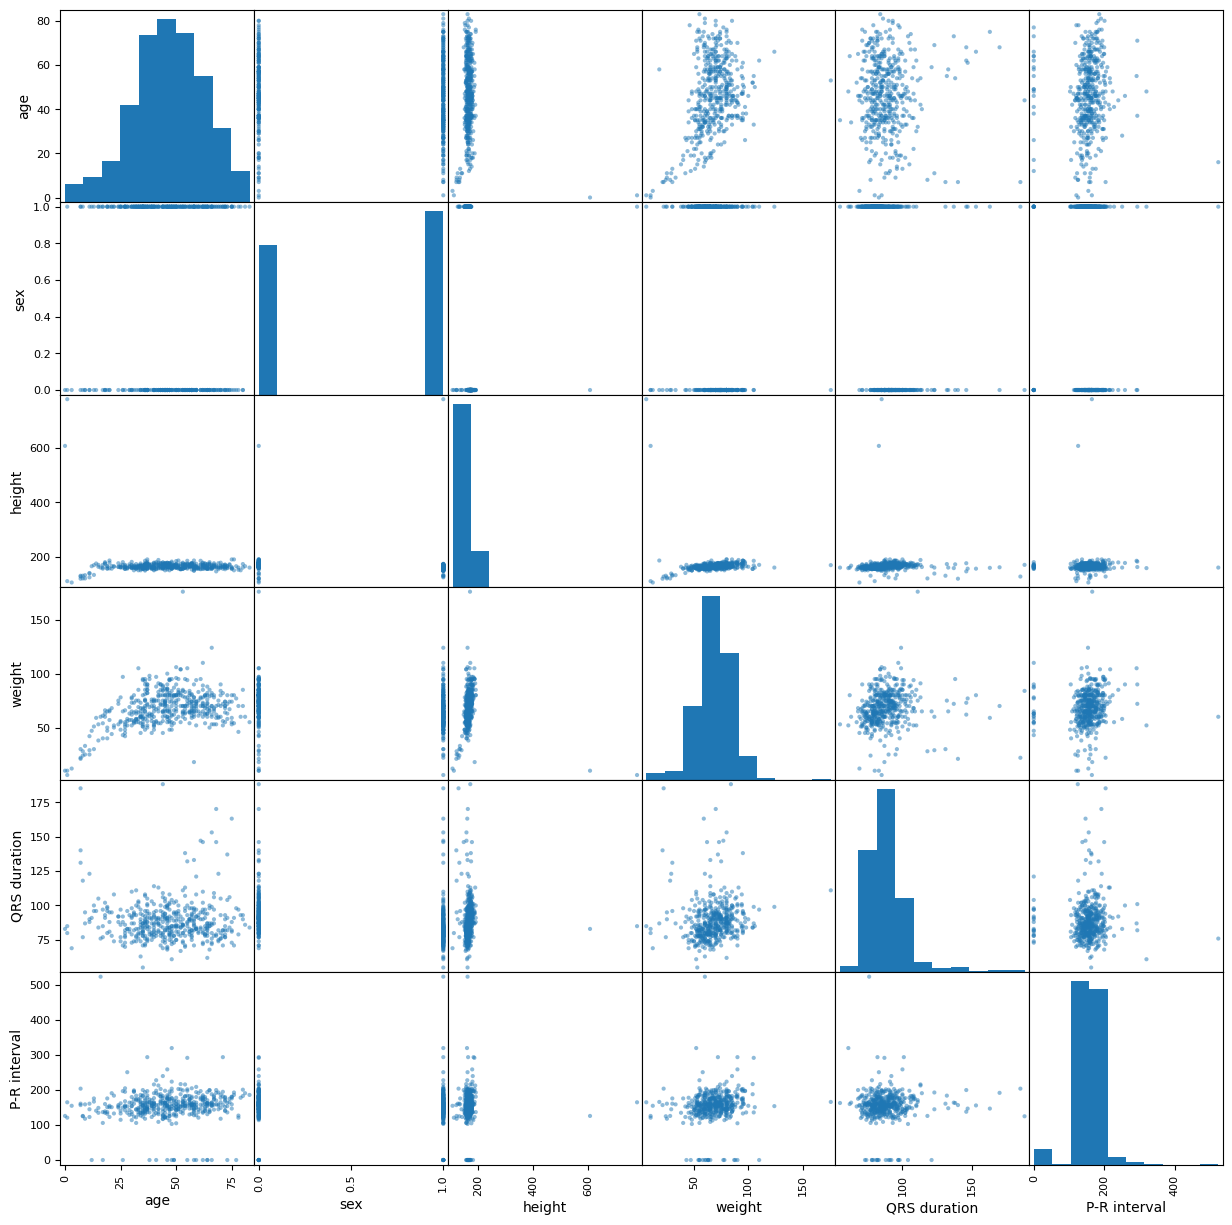

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

# Part 2: Using tf.keras

In [ ]:
# use keras get_file to download the auto MPG dataset
# source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
# import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# check out the documentation for other arguments
tf.keras.utils.get_file('auto-mpg.data', url)

30286/30286 [==============================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [ ]:
# the data is downloaded to /root/.keras/datasets/ by default
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Part 3: Upload the file to colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
# uploaded

In [ ]:
!ls

arrhythmia.data  data.csv  sample_data


In [ ]:
!head data.csv

headline,clickbait
14 People Who You Totally Have Saved In Your Phone,1
Episcopal Vote Reopens a Door to Gay Bishops,0
Main UN compound in Gaza shelled with 'white phosphorus',0
Are You More Like Julianne Or Derek Hough,1
50 dead after ferry in Myanmar capsizes,0
18 Euphoric Moments For Twentysomethings Who Are Basically Grandmas,1
Oprah And Shonda Rhimes Reveal Why Marriage Isn't For Them,1
This Lingerie Company's New Model Is Unapologetically Curvy,1
1 Terrible Photoshop Of Regis Philbin In Princess Leia's Bikini,1


In [ ]:
df = pd.read_csv('./data.csv')
df.head()

,headline,clickbait
0,14 People Who You Totally Have Saved In Your P...,1
1,Episcopal Vote Reopens a Door to Gay Bishops,0
2,Main UN compound in Gaza shelled with 'white p...,0
3,Are You More Like Julianne Or Derek Hough,1
4,50 dead after ferry in Myanmar capsizes,0


# Part 4: Access files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

arrhythmia.data  data.csv  drive  sample_data


In [ ]:
!ls drive

MyDrive


In [ ]:
!ls drive/MyDrive/

 colab-notebooks   documents   management  'Pictures & Videos'
